# Распознавание рукописных цифр при помощи полносвязной нейронной сети

In [41]:
##WRITE YOUR CODE HERE
import random
import ssl
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.optim import Adam

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [42]:
ssl._create_default_https_context = ssl._create_unverified_context # нужды MacOS

Загрузим набор данных MNIST:

In [43]:
MNIST_train = datasets.MNIST('./', train=True, download=True) ##WRITE YOUR CODE HERE('./', ##WRITE YOUR CODE HERE)
MNIST_test = datasets.MNIST('./', train=False, download=True) ##WRITE YOUR CODE HERE('./', ##WRITE YOUR CODE HERE)

Разделим данные на тестовые и тренировочные множества:

In [44]:
X_train = MNIST_train.data ##WRITE YOUR CODE HERE.data
y_train = MNIST_train.targets ##WRITE YOUR CODE HERE.targets
X_test = MNIST_test.data ##WRITE YOUR CODE HERE.data
y_test = MNIST_test.targets ##WRITE YOUR CODE HERE.targets

Посмотрим на тип данных:

In [45]:
X_train.dtype, y_train.dtype ##WRITE YOUR CODE HERE, y_train.##WRITE YOUR CODE HERE

(torch.uint8, torch.int64)

Переведём их в тип float:

In [46]:
X_train = X_train.float() ##WRITE YOUR CODE HERE
X_test = X_test.float() ##WRITE YOUR CODE HERE

Узнаем размерности получившихся четырёх множеств:

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape ##WRITE YOUR CODE HERE

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))



Выведем на экран одно из изображений тренировочного множества:

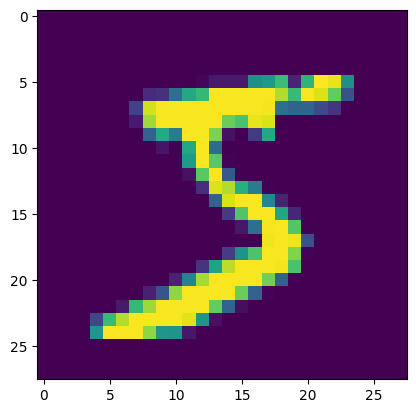

tensor(5)


In [48]:
plt.imshow(X_train[0, :, :])  ##WRITE YOUR CODE HERE[0, :, :])
plt.show()
print(y_train[0])

Изменим размерности, чтобы выполнялось последующее матричное умножение:

In [49]:
X_train = torch.reshape(X_train, [-1, 28 * 28]) ##WRITE YOUR CODE HERE([-1, 28 * 28])
X_test = torch.reshape(X_test, [-1, 28 * 28]) ##WRITE YOUR CODE HERE([-1, 28 * 28])

Напишем класс для нейронной сети, она будет состоять из входного слоя с последующей функцией активации сигмоидой и входного слоя:

In [50]:
class MNISTNet(torch.nn.Module): ##WRITE YOUR CODE HERE):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(784, n_hidden_neurons), ##WRITE YOUR CODE HERE
            nn.Sigmoid(), ##WRITE YOUR CODE HERE
            nn.Linear(n_hidden_neurons, 10) ##WRITE YOUR CODE HERE
            )

    def forward(self, x):
        x = self.seq(x) ##WRITE YOUR CODE HERE
        return x

Создадим экземпляр класса со 100 нейронами на скрытом слое:

In [51]:
mnist_net = MNISTNet(100) ##WRITE YOUR CODE HERE

Определим функцию потерь через кросс-энтропию, а в качестве оптимизатора возьмём Adam с шагом обучения 0,001, лучше lr=1.0e-3.

In [52]:
loss = nn.CrossEntropyLoss() ##WRITE YOUR CODE HERE
optimizer = Adam(mnist_net.parameters(), lr=0.001, weight_decay=0.0001) ##WRITE YOUR CODE HERE

In [53]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

Обучим нашу нейронную сеть:

In [54]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []


for epoch in range(100):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        ##WRITE YOUR CODE HERE
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index + batch_size] ##WRITE YOUR CODE HERE]

        X_batch = X_train[batch_indexes] ##WRITE YOUR CODE HERE] 
        y_batch = y_train[batch_indexes] ##WRITE YOUR CODE HERE] 

        preds = mnist_net.forward(X_batch) ##WRITE YOUR CODE HERE

        loss_value = loss(preds, y_batch) ##WRITE YOUR CODE HERE
        loss_value.backward() ##WRITE YOUR CODE HERE

        optimizer.step() ##WRITE YOUR CODE HERE

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy) ##WRITE YOUR CODE HERE)
    print(accuracy)

tensor(0.9101)
tensor(0.9147)
tensor(0.9185)
tensor(0.9232)
tensor(0.9214)
tensor(0.9252)
tensor(0.9282)
tensor(0.9257)
tensor(0.9303)
tensor(0.9345)
tensor(0.9376)
tensor(0.9306)
tensor(0.9376)
tensor(0.9366)
tensor(0.9368)
tensor(0.9350)
tensor(0.9382)
tensor(0.9405)
tensor(0.9411)
tensor(0.9376)
tensor(0.9411)
tensor(0.9429)
tensor(0.9439)
tensor(0.9423)
tensor(0.9391)
tensor(0.9445)
tensor(0.9411)
tensor(0.9468)
tensor(0.9449)
tensor(0.9433)
tensor(0.9430)
tensor(0.9391)
tensor(0.9448)
tensor(0.9414)
tensor(0.9433)
tensor(0.9446)
tensor(0.9445)
tensor(0.9477)
tensor(0.9495)
tensor(0.9464)
tensor(0.9485)
tensor(0.9495)
tensor(0.9481)
tensor(0.9436)
tensor(0.9510)
tensor(0.9467)
tensor(0.9483)
tensor(0.9494)
tensor(0.9492)
tensor(0.9471)
tensor(0.9514)
tensor(0.9517)
tensor(0.9541)
tensor(0.9503)
tensor(0.9483)
tensor(0.9507)
tensor(0.9513)
tensor(0.9528)
tensor(0.9537)
tensor(0.9491)
tensor(0.9464)
tensor(0.9486)
tensor(0.9564)
tensor(0.9556)
tensor(0.9560)
tensor(0.9524)
tensor(0.9

Выведем на экран значения точности и потерь:

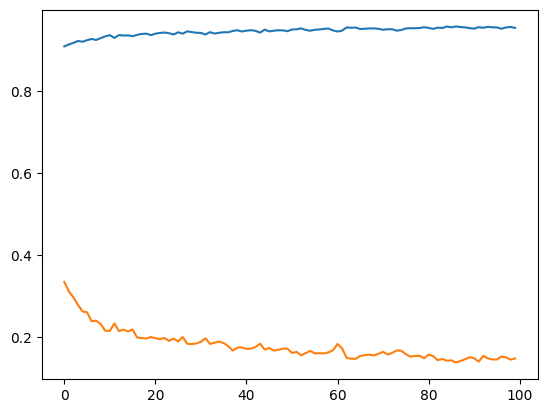

In [55]:
plt.plot([t.detach().numpy() for t in test_accuracy_history]) ##WRITE YOUR CODE HERE:
plt.plot([t.detach().numpy() for t in test_loss_history])
plt.show()